In [132]:
!python --version

Python 3.13.1


In [137]:
!pip install matplotlib
!pip install seaborn
!pip install spicy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns  
import warnings
import scipy.stats as stats 

In [2]:
# Load the dataset
df = pd.read_csv("data/Bank_Transaction_Fraud_Detection.csv")

# Display first few rows
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
df.shape

(200000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [11]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


In [7]:
df['Is_Fraud'].value_counts(normalize=True) * 100  # Check fraud percentage

Is_Fraud
0    94.956
1     5.044
Name: proportion, dtype: float64

In [81]:
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])

def categorize_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Transaction_Time'] = df['Transaction_Time'].apply(categorize_time)

C:\Users\Palvi\AppData\Local\Temp\ipykernel_9624\2493909172.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])


In [82]:
df['Transaction_Time'].head()

0    Afternoon
1      Evening
2        Night
3    Afternoon
4      Evening
Name: Transaction_Time, dtype: object

In [101]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_year'] = df['Transaction_Date'].dt.year
df['Transaction_month'] = df['Transaction_Date'].dt.month_name()
df['Transaction_day'] = df['Transaction_Date'].dt.day_name()

C:\Users\Palvi\AppData\Local\Temp\ipykernel_9624\1588028185.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])


# Univariate Analysis

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Transaction_Amount'}>],
       [<Axes: title={'center': 'Account_Balance'}>,
        <Axes: title={'center': 'Is_Fraud'}>]], dtype=object)

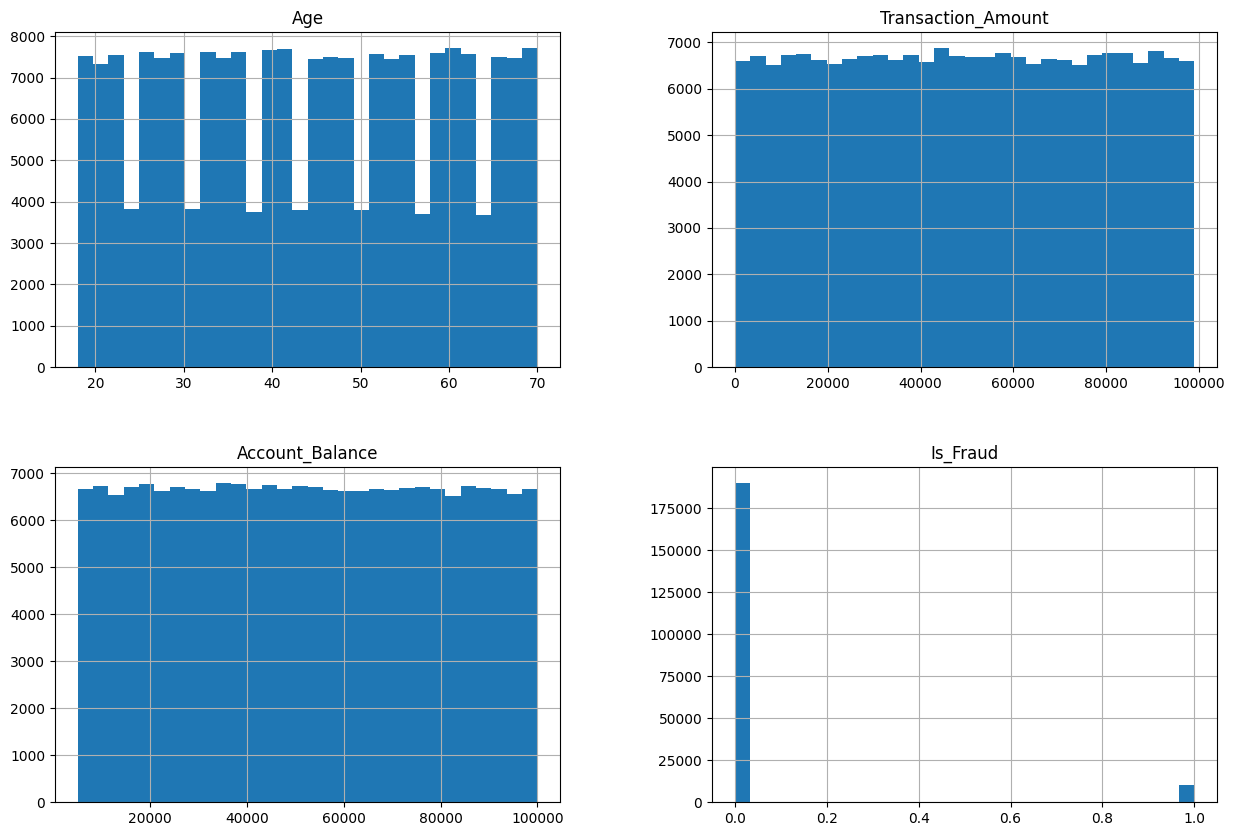

In [20]:
df.hist(figsize=(15, 10), bins=30)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

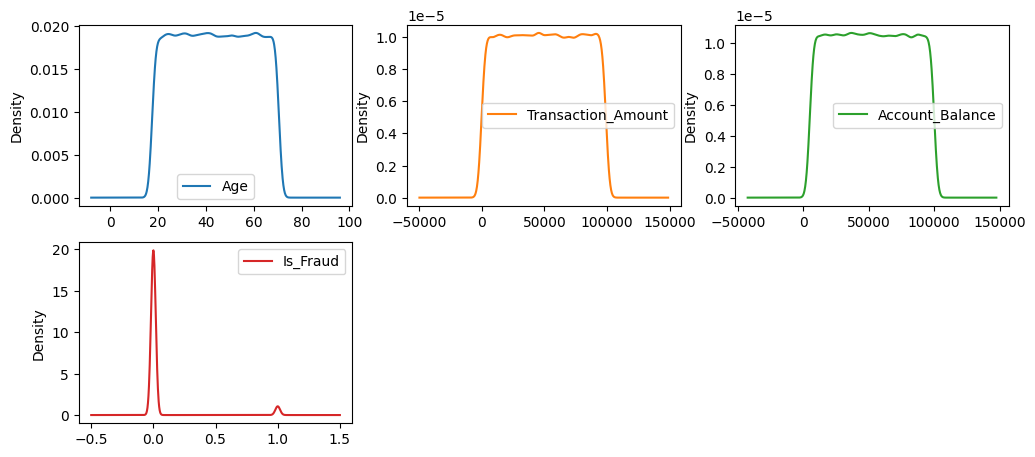

In [25]:
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(12,8), sharex=False)

<Axes: ylabel='count'>

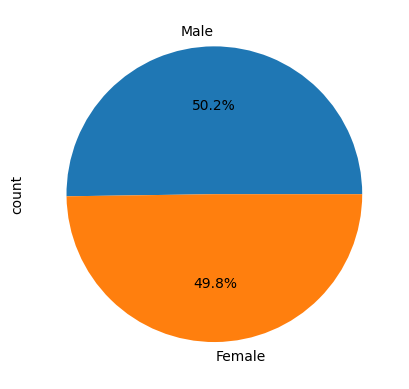

In [32]:
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

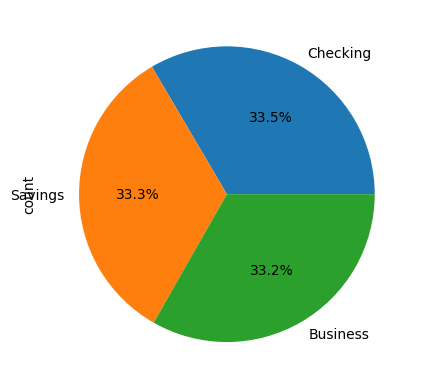

In [36]:
df["Account_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

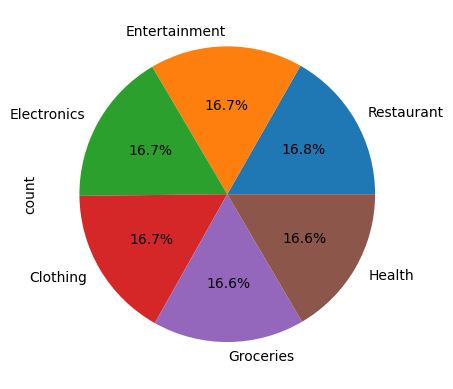

In [37]:
df["Merchant_Category"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

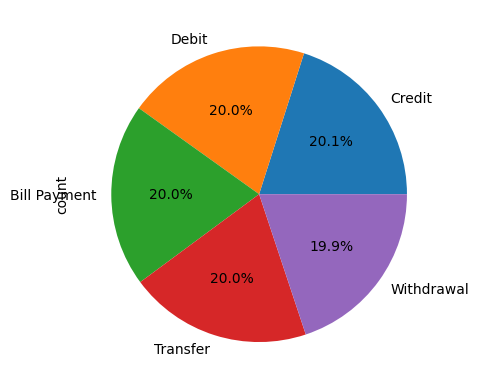

In [38]:
df["Transaction_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

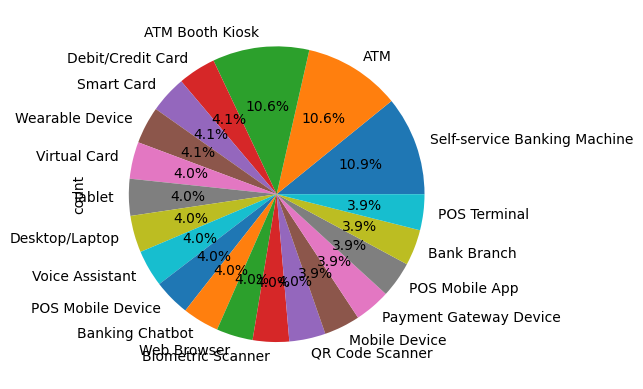

In [40]:
df["Transaction_Device"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

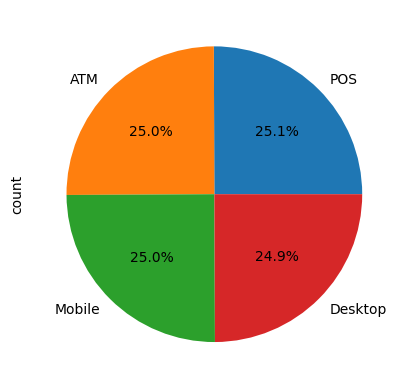

In [41]:
df["Device_Type"].value_counts().plot.pie(autopct="%1.1f%%") 

<Axes: ylabel='count'>

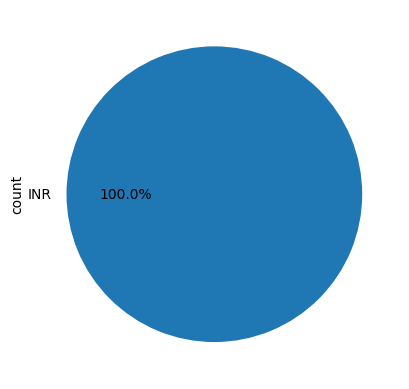

In [43]:
df["Transaction_Currency"].value_counts().plot.pie(autopct="%1.1f%%") 

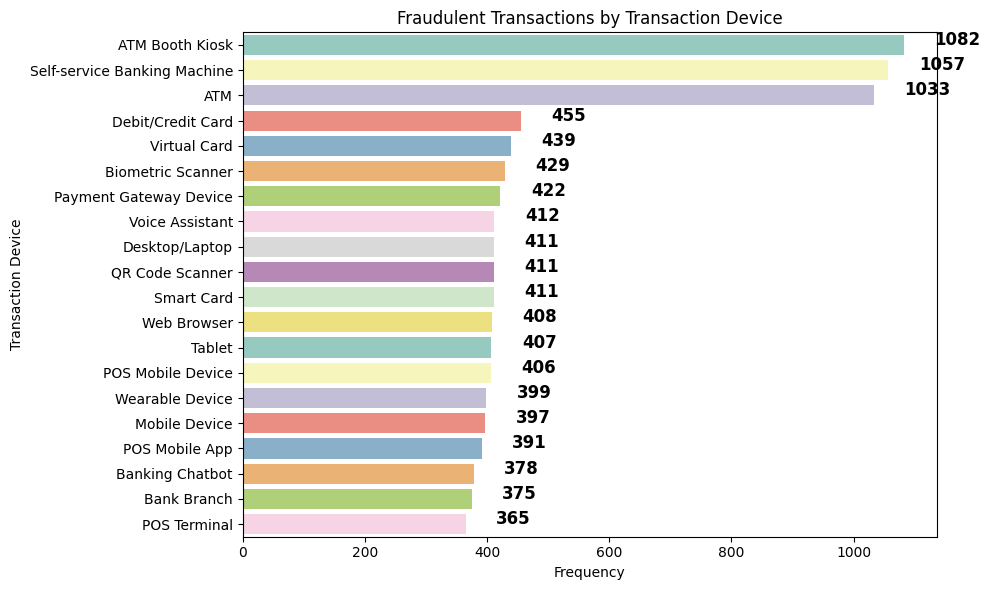

In [120]:
fraud_df = df[df['Is_Fraud'] == 1]
fraud_counts = fraud_df['Transaction_Device'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="Set3", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Device")
plt.title("Fraudulent Transactions by Transaction Device")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


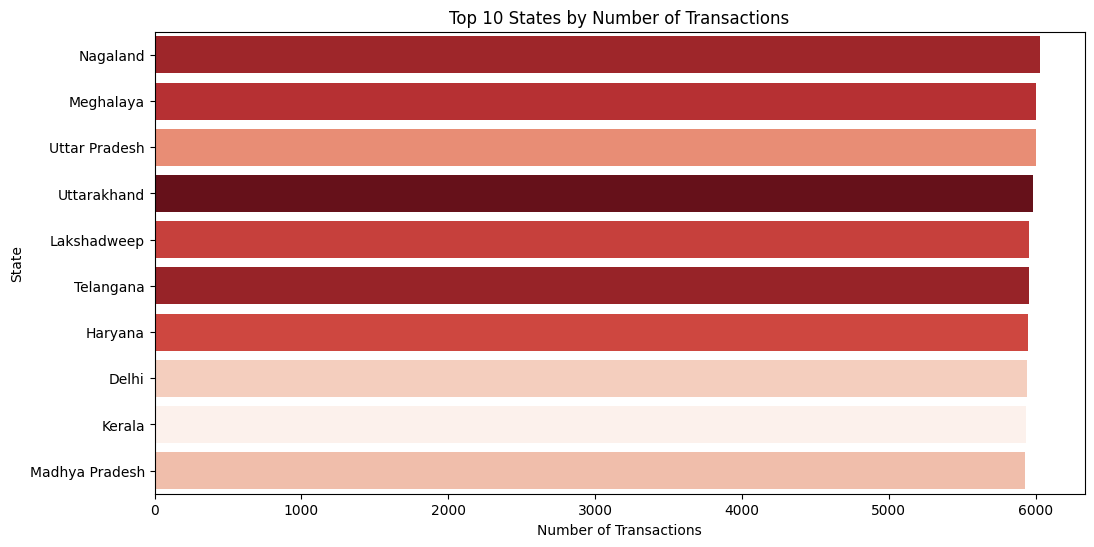

In [114]:
# Transactions by State
plt.figure(figsize=(12, 6))
sns.countplot(y=df['State'], order=df['State'].value_counts().index[:10], hue = df['State'], palette='Reds', legend=False)
plt.title("Top 10 States by Number of Transactions")
plt.ylabel("State")
plt.xlabel("Number of Transactions")
plt.show()

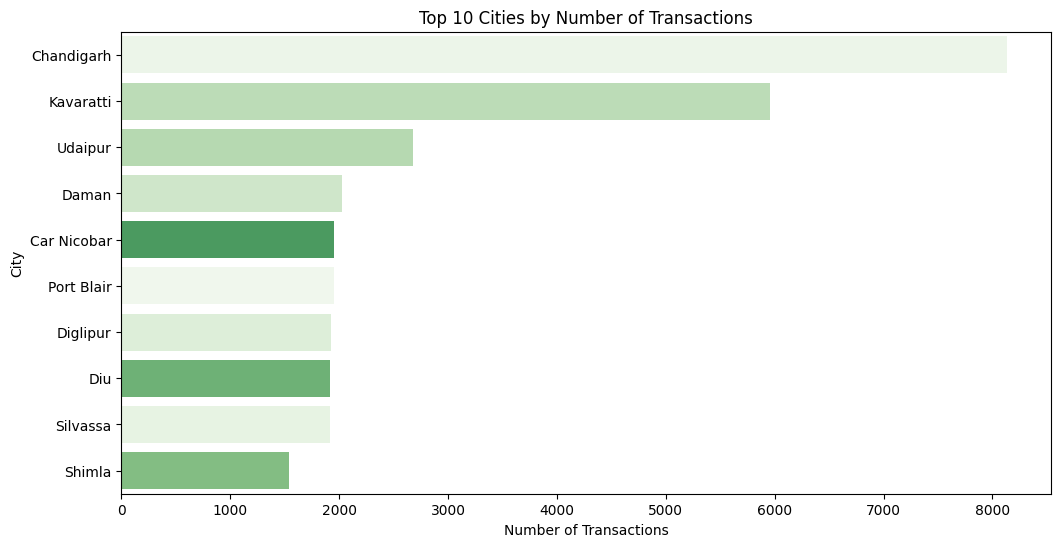

In [122]:
# Transactions by City
plt.figure(figsize=(12, 6))
sns.countplot(y=df['City'], order=df['City'].value_counts().index[:10], hue=df['City'], palette='Greens', legend=False)
plt.title("Top 10 Cities by Number of Transactions")
plt.ylabel("City")
plt.xlabel("Number of Transactions")
plt.show()

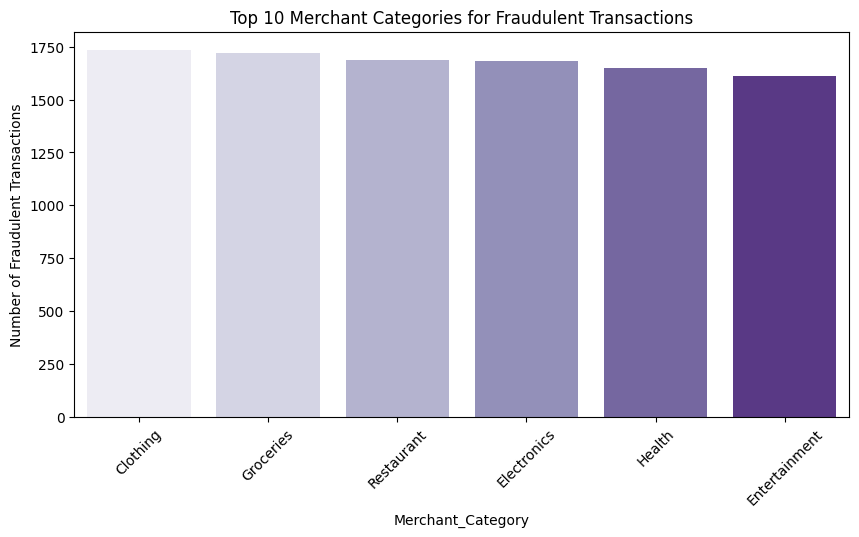

In [123]:
# Fraud by merchant category
fraud_merchant = df[df['Is_Fraud'] == 1]['Merchant_Category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_merchant.index, y=fraud_merchant.values, hue =fraud_merchant.index, palette = "Purples", legend=False)
plt.title("Top 10 Merchant Categories for Fraudulent Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

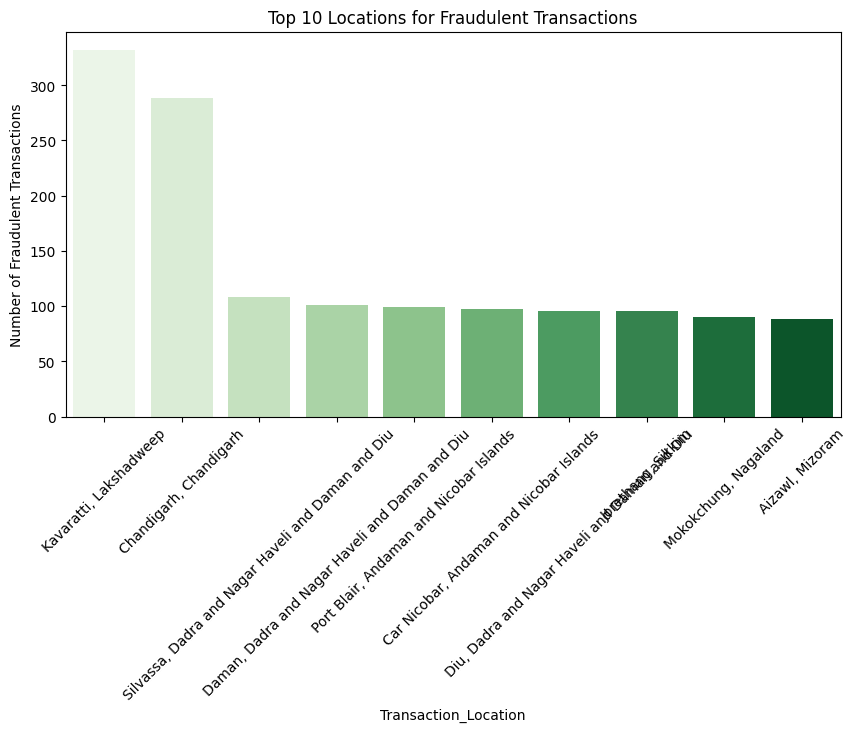

In [124]:
# Fraud by transaction location
fraud_location = df[df['Is_Fraud'] == 1]['Transaction_Location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=fraud_location.index, y=fraud_location.values, hue=fraud_location.index, palette='Greens', legend=False)
plt.title("Top 10 Locations for Fraudulent Transactions")
plt.xticks(rotation=45)
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

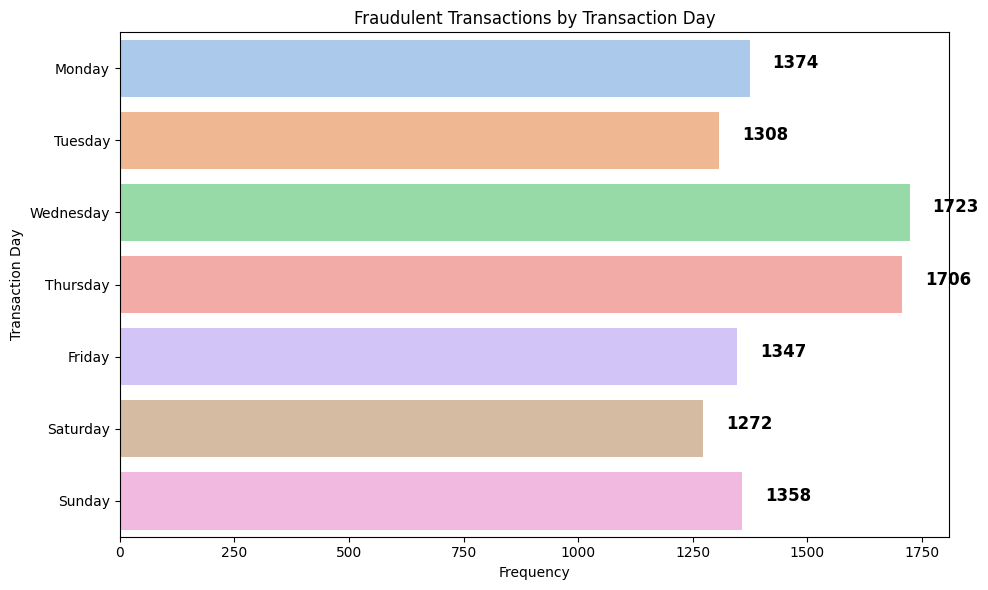

In [125]:
fraud_counts = fraud_df['Transaction_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0  # Ensuring all days are represented
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Transaction Day")
plt.title("Fraudulent Transactions by Transaction Day")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()

# Bivariate Analysis

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Age'>,
        <Axes: xlabel='Account_Balance', ylabel='Age'>,
        <Axes: xlabel='Is_Fraud', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Account_Balance', ylabel='Transaction_Amount'>,
        <Axes: xlabel='Is_Fraud', ylabel='Transaction_Amount'>],
       [<Axes: xlabel='Age', ylabel='Account_Balance'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Account_Balance'>,
        <Axes: xlabel='Account_Balance', ylabel='Account_Balance'>,
        <Axes: xlabel='Is_Fraud', ylabel='Account_Balance'>],
       [<Axes: xlabel='Age', ylabel='Is_Fraud'>,
        <Axes: xlabel='Transaction_Amount', ylabel='Is_Fraud'>,
        <Axes: xlabel='Account_Balance', ylabel='Is_Fraud'>,
        <Axes: xlabel='Is_Fraud', ylabel='Is_Fraud'>]], dtype=object)

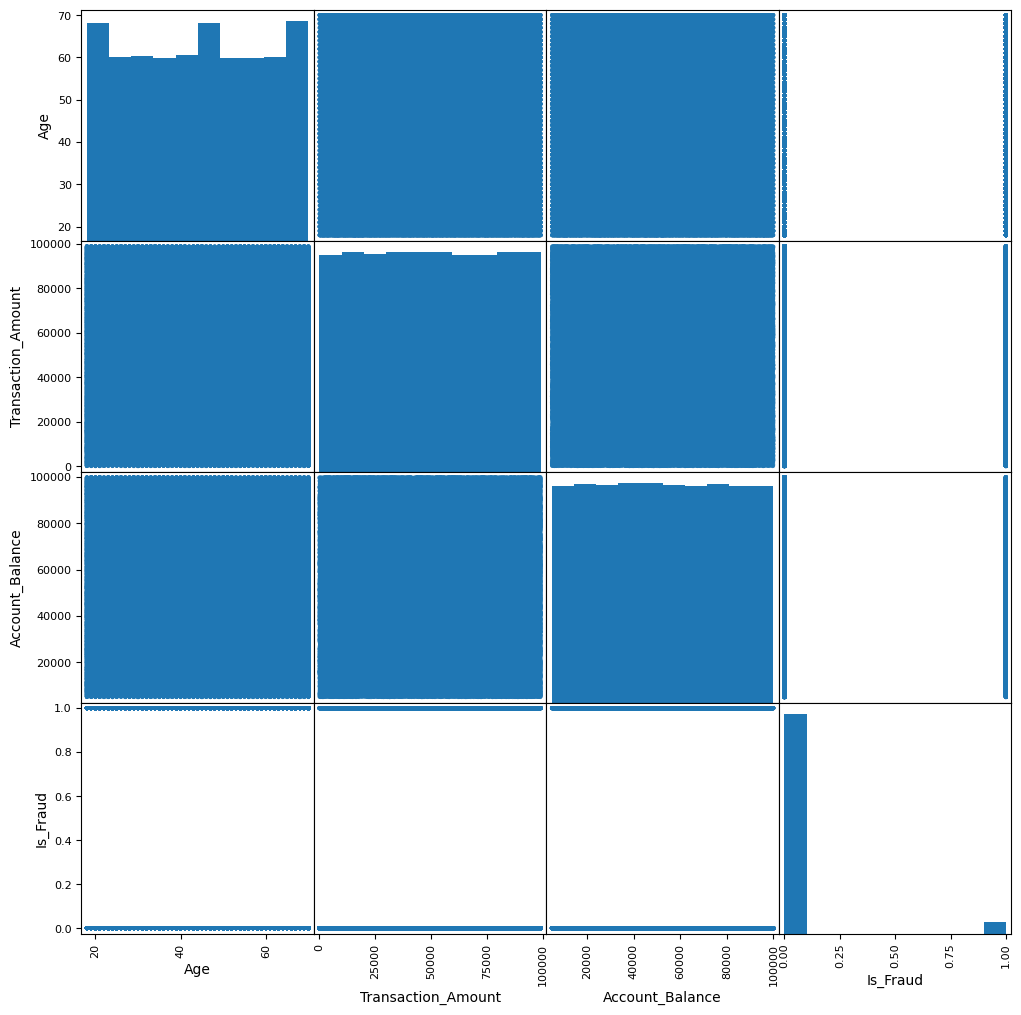

In [44]:
pd.plotting.scatter_matrix(df, figsize=(12,12))

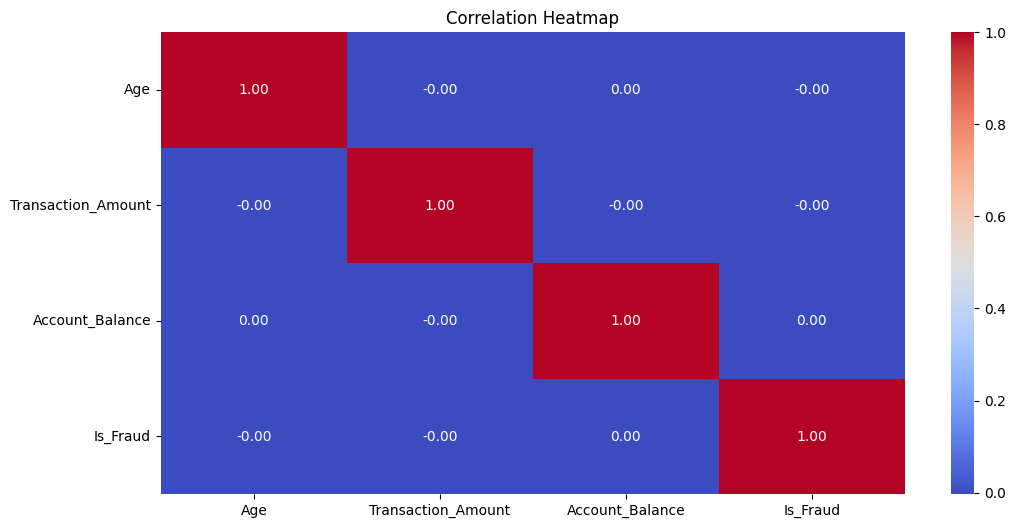

In [46]:
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


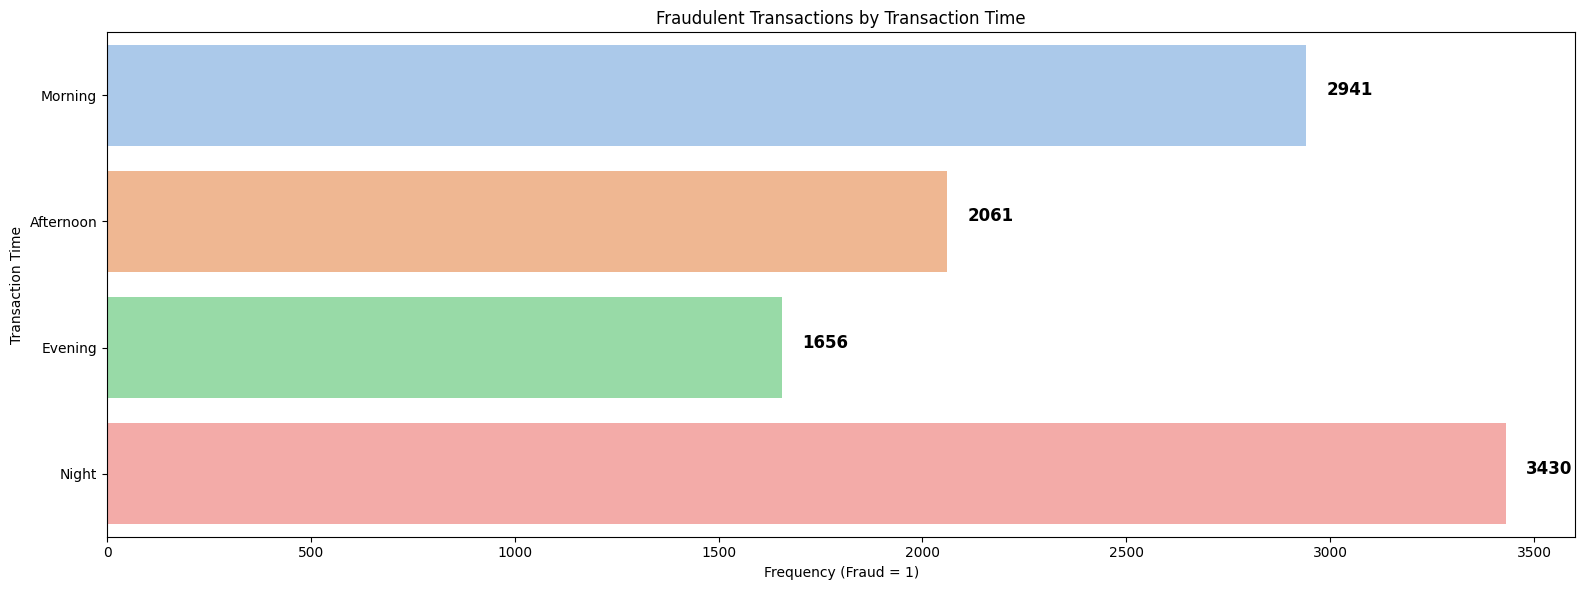

In [117]:
fraud_df = df[df['Is_Fraud'] == 1]

# Count occurrences for each transaction time category
fraud_counts = fraud_df['Transaction_Time'].value_counts().reindex(
    ['Morning', 'Afternoon', 'Evening', 'Night'], fill_value=0
)  

# Plot the data
plt.figure(figsize=(16, 6))
ax = sns.barplot(y=fraud_counts.index, x=fraud_counts.values, hue=fraud_counts.index, palette="pastel", legend = False)
plt.xlabel("Frequency (Fraud = 1)")
plt.ylabel("Transaction Time")
plt.title("Fraudulent Transactions by Transaction Time")
for index, value in enumerate(fraud_counts.values):
    ax.text(value + 50, index, f"{value}", fontsize=12, fontweight="bold", ha="left")
plt.tight_layout()
plt.show()


# Multivariate Analysis

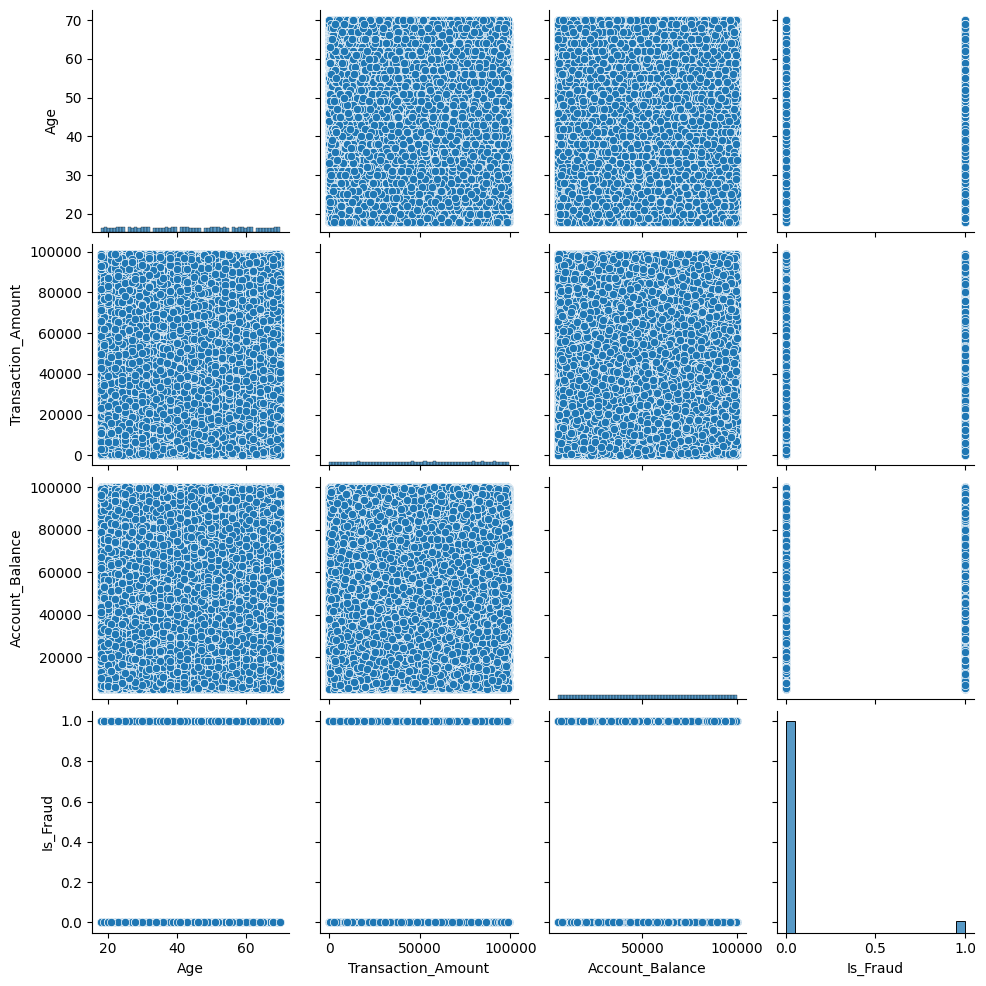

In [47]:
sns.pairplot(df)

# Relationship between Target and other Variables

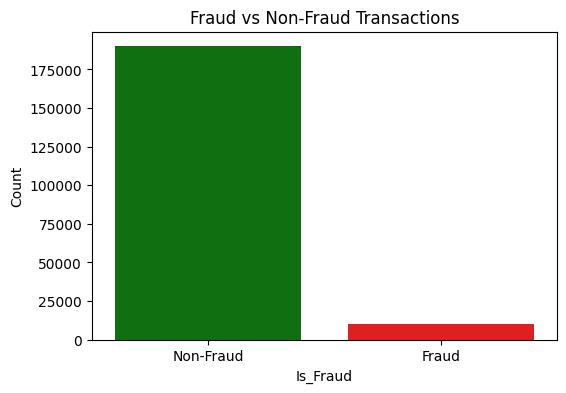

In [109]:
fraud_count = df['Is_Fraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, hue=fraud_count.index, palette=['green', 'red'], legend=False)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.ylabel("Count")
plt.show()

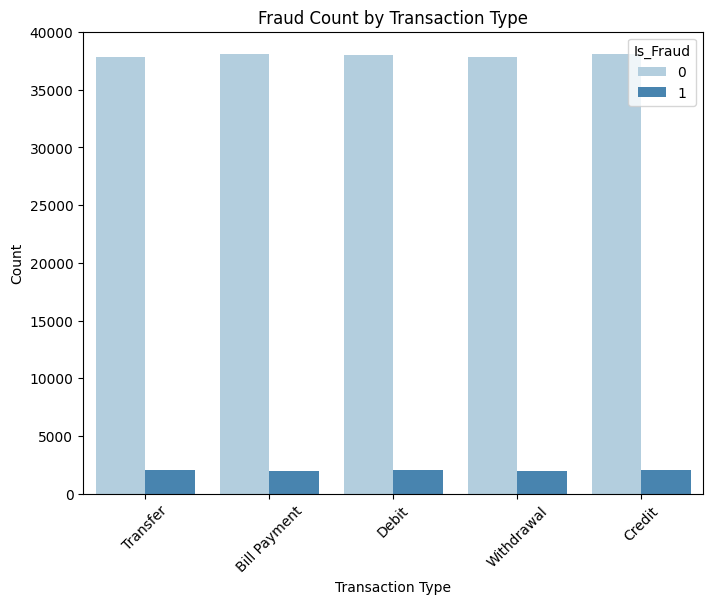

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(x="Transaction_Type", hue="Is_Fraud", data=df, palette="Blues")
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Outliers

Age                      Axes(0.125,0.11;0.168478x0.77)
Transaction_Amount    Axes(0.327174,0.11;0.168478x0.77)
Account_Balance       Axes(0.529348,0.11;0.168478x0.77)
Is_Fraud              Axes(0.731522,0.11;0.168478x0.77)
dtype: object

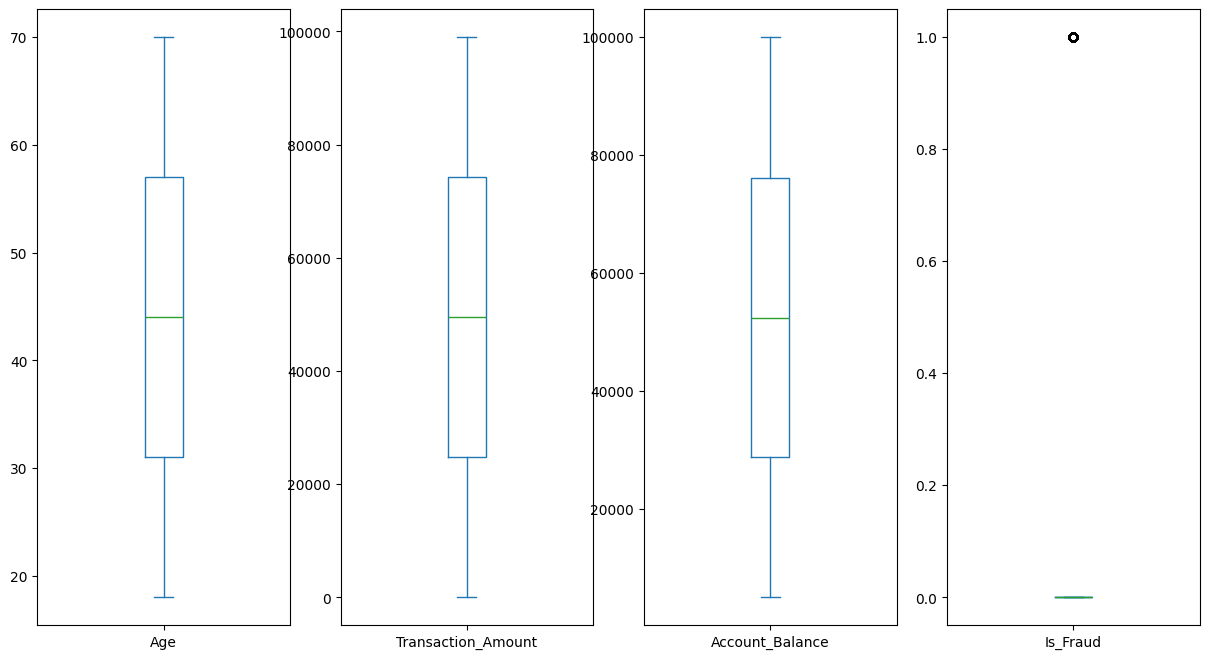

In [49]:
df.plot(kind='box', subplots=True, figsize=(15,8))

In [130]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, explorative=True)
profile.to_file("eda_report.html")

ModuleNotFoundError: No module named 'ydata_profiling'